>> LINAC #1
>> SHOT #1
Tracking element #1 (s = 0.5 m, -1.0 nC, 3.0 GeV, SourceBasic, stage 0)
Tracking element #2 (s = 1.5 m, -1.0 nC, 8.5 GeV, StageNonlinear1D, stage 1)
Tracking element #3 (s = 5.0 m, -1.0 nC, 8.5 GeV, InterstageELEGANT, stage 1)
Tracking element #4 (s = 6.0 m, -1.0 nC, 14.0 GeV, StageNonlinear1D, stage 2)
Tracking element #5 (s = 10.6 m, -1.0 nC, 14.0 GeV, InterstageELEGANT, stage 2)
Tracking element #6 (s = 11.6 m, -1.0 nC, 19.4 GeV, StageNonlinear1D, stage 3)
Tracking element #7 (s = 16.9 m, -1.0 nC, 19.4 GeV, InterstageELEGANT, stage 3)
Tracking element #8 (s = 17.9 m, -1.0 nC, 24.8 GeV, StageNonlinear1D, stage 4)
Tracking element #9 (s = 24.0 m, -1.0 nC, 24.8 GeV, InterstageELEGANT, stage 4)
Tracking element #10 (s = 25.0 m, -1.0 nC, 30.4 GeV, StageNonlinear1D, stage 5)
Tracking element #11 (s = 31.7 m, -1.0 nC, 30.4 GeV, InterstageELEGANT, stage 5)
Tracking element #12 (s = 32.7 m, -1.0 nC, 35.9 GeV, StageNonlinear1D, stage 6)
Tracking element #13 (s = 39.9 m,

/Users/carlal/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/carlal/UiO/python/OPAL/examples/../opal/physicsmodels/plasmawake1D.py:69: RuntimeWarning: invalid value encountered in double_scalars
  kr0 = [krbs[-1], dpsi_dkz[-1]/np.sqrt(psi[-1])]
/Users/carlal/UiO/python/OPAL/examples/../opal/physicsmodels/plasmawake1D.py:17: RuntimeWarning: divide by zero encountered in divide
  return kr[1], -2*kr[1]**2/kr[0] - 1/kr[0] - 2*k_p(n0)**3*dN_dkz(kz)/(np.pi*n0*kr[0]**3)
/Users/carlal/UiO/python/OPAL/examples/../opal/physicsmodels/plasmawake1D.py:17: RuntimeWarning: invalid value encountered in divide
  return kr[1], -2*kr[1]**2/kr[0] - 1/kr[0] - 2*k_p(n0)**3*dN_dkz(kz)/(np.pi*n0*kr[0]**3)


>> Recalculating wakefield with new driver, problem with ODE solver (attempt #1)
Tracking element #26 (s = 100.8 m, -0.8 nC, 75.5 GeV, StageNonlinear1D, stage 13)
Tracking element #27 (s = 111.2 m, -0.8 nC, 75.5 GeV, InterstageELEGANT, stage 13)
Tracking element #28 (s = 112.2 m, -0.8 nC, 81.2 GeV, StageNonlinear1D, stage 14)
Tracking element #29 (s = 132.2 m, -0.8 nC, 81.2 GeV, BeamDeliverySystemBasic, stage 14)
>> SHOT #2
Tracking element #1 (s = 0.5 m, -1.0 nC, 3.0 GeV, SourceBasic, stage 0)
Tracking element #2 (s = 1.5 m, -1.0 nC, 8.5 GeV, StageNonlinear1D, stage 1)
Tracking element #3 (s = 5.0 m, -1.0 nC, 8.5 GeV, InterstageELEGANT, stage 1)
Tracking element #4 (s = 6.0 m, -1.0 nC, 13.9 GeV, StageNonlinear1D, stage 2)
Tracking element #5 (s = 10.6 m, -1.0 nC, 13.9 GeV, InterstageELEGANT, stage 2)
Tracking element #6 (s = 11.6 m, -1.0 nC, 19.3 GeV, StageNonlinear1D, stage 3)
Tracking element #7 (s = 16.9 m, -1.0 nC, 19.3 GeV, InterstageELEGANT, stage 3)
Tracking element #8 (s = 17.

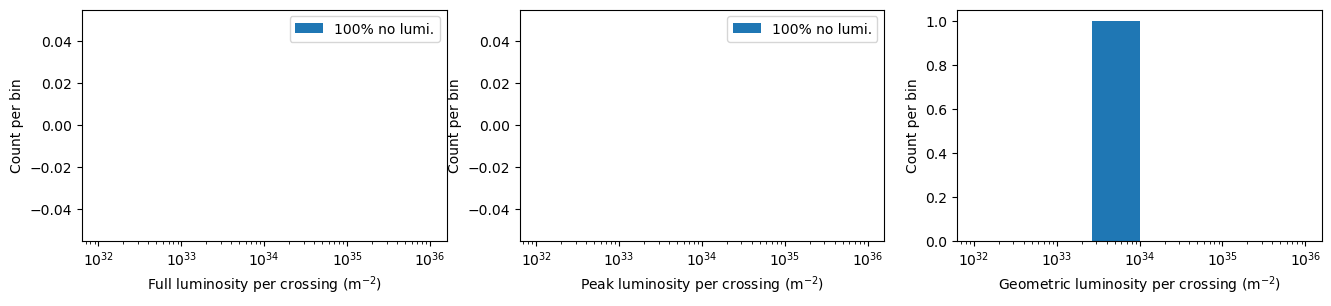

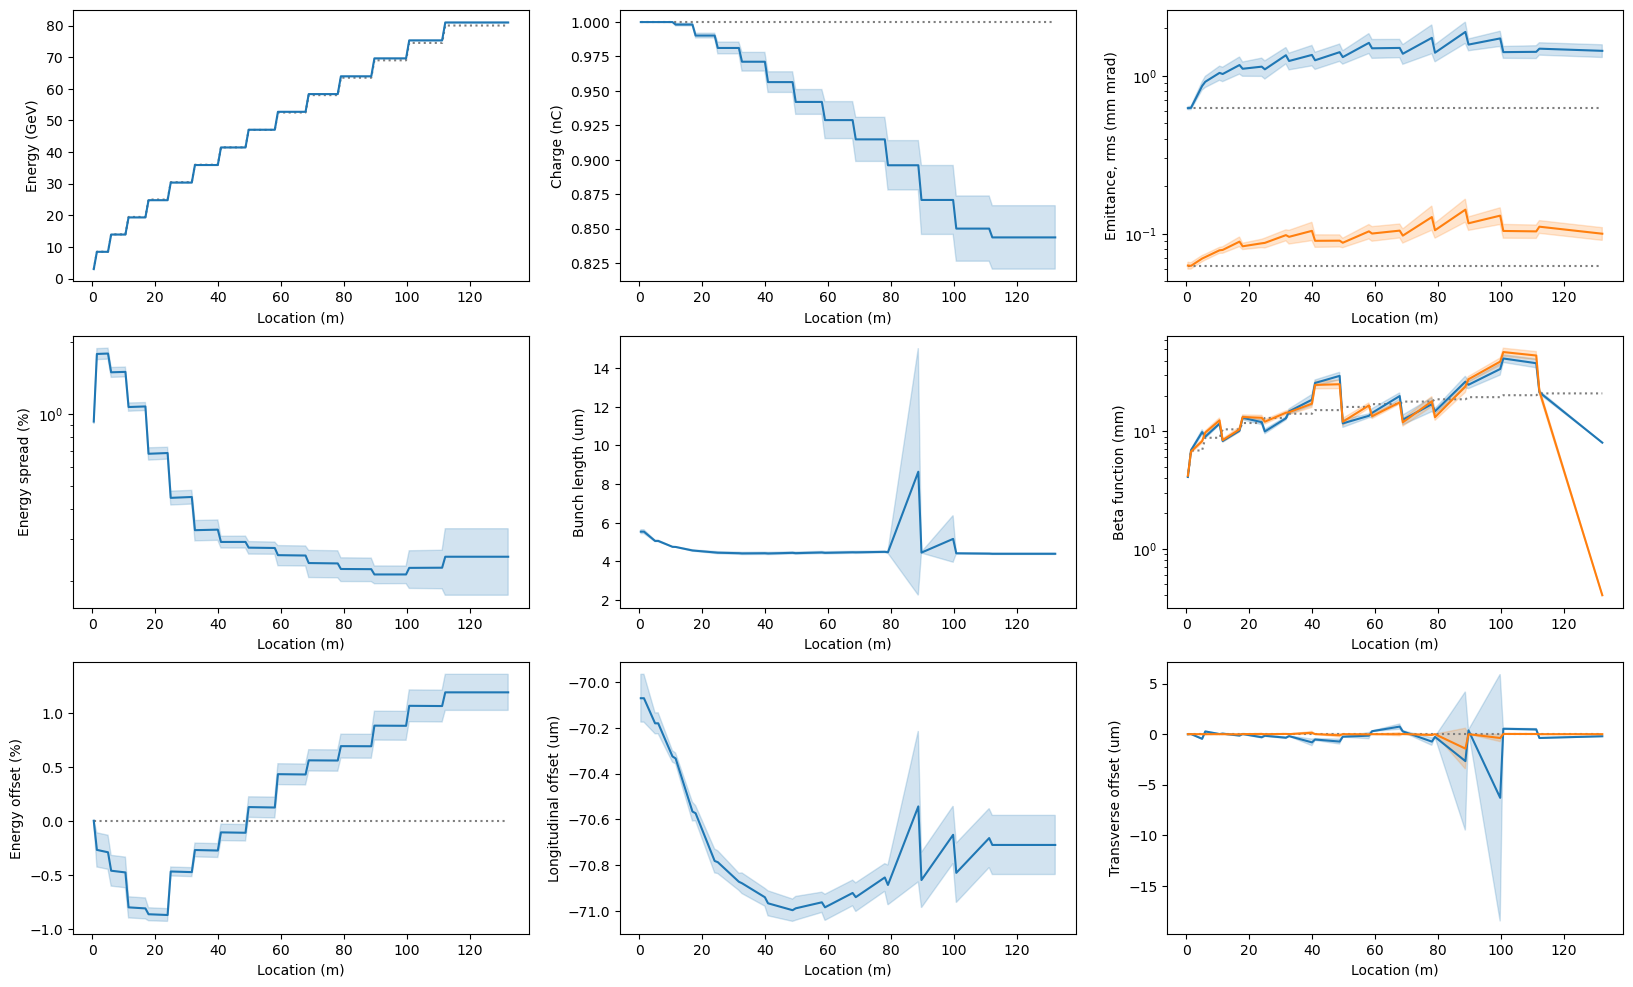

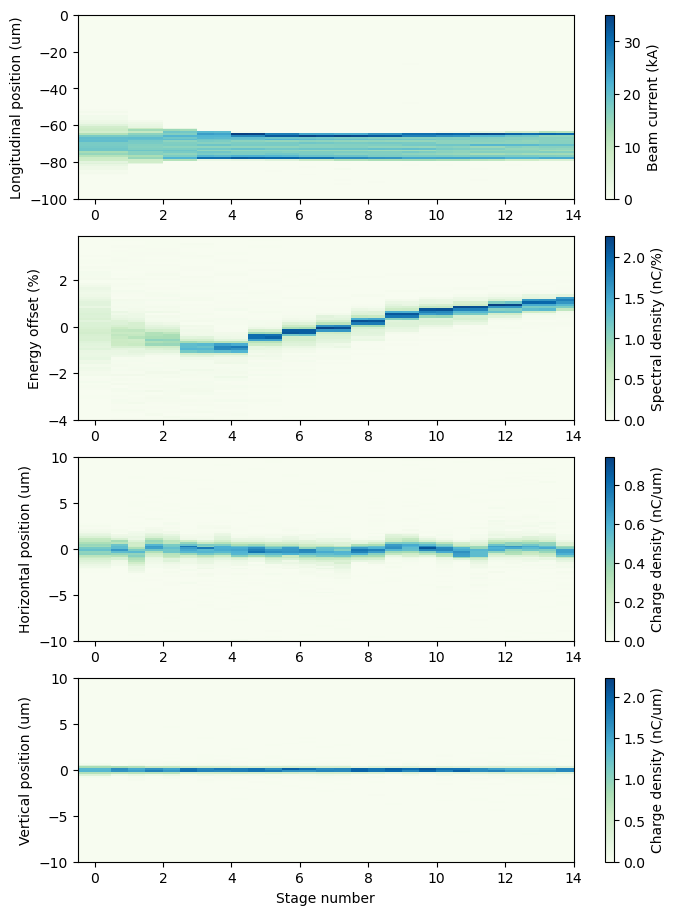

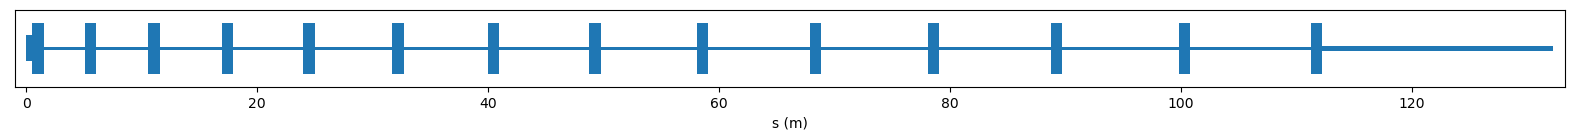

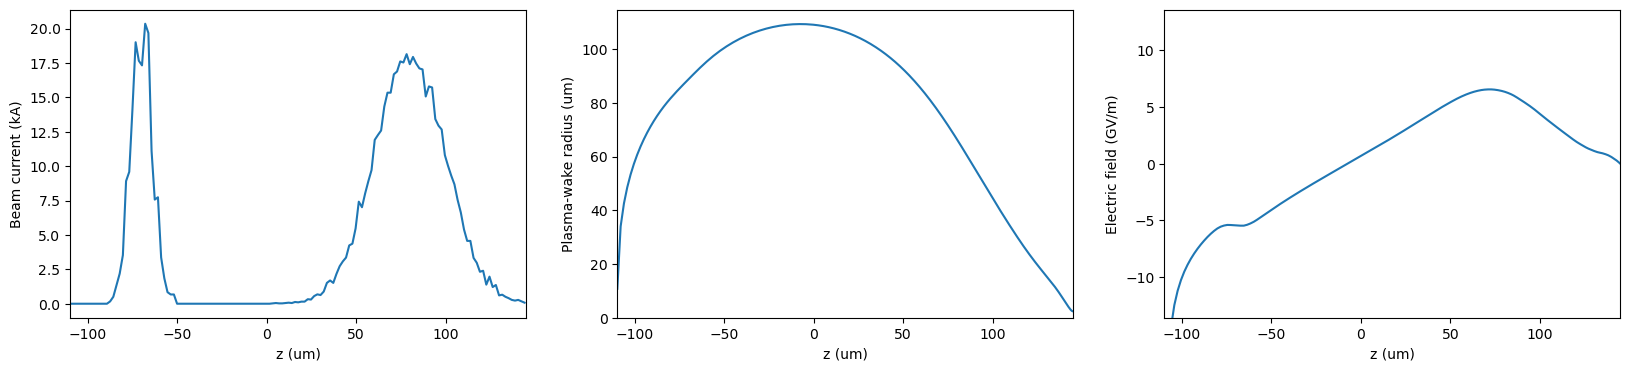

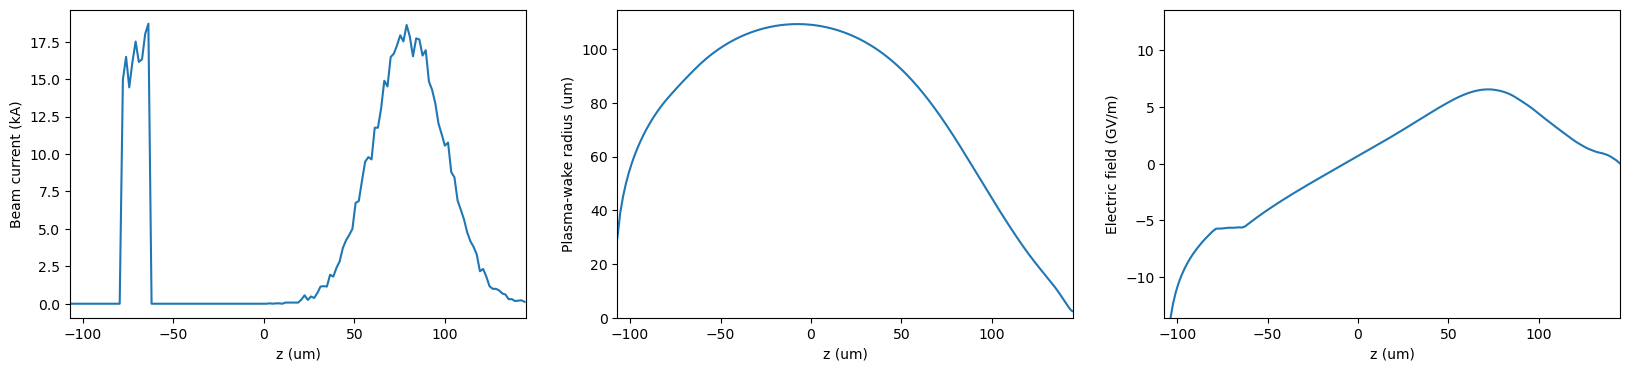

In [1]:
import sys
sys.path.append('../')
from opal import Linac, Collider
from opal import SourceBasic, StageNonlinear1D, InterstageELEGANT, BeamDeliverySystemBasic, InteractionPointGUINEAPIG
from opal.utilities.plasmaphysics import beta_matched
import numpy as np

# define driver
driver = SourceBasic()
driver.Q = -3e-9 # [C]
driver.E0 = 10e9 # [eV]
driver.relsigE = 0.01
driver.sigz = 20e-6 # [m]
driver.z = 80e-6 # [m]
driver.emitnx, driver.emitny = 10e-6, 10e-6 # [m rad]
driver.betax, driver.betay = 30e-3, 30e-3 # [m]
driver.Npart = 20000

# define stage
stage = StageNonlinear1D()
stage.driverSource = driver
stage.deltaE = 5.5e9 # [eV]
stage.L = 1 # [m]
stage.n0 = 2e22 # [m^-3]
stage.enableBetatron = True

# define beam
source = SourceBasic()
source.L = 0.5 # [m]
source.Q = -1e-9 # [C]
source.E0 = 3e9 # [eV]
source.relsigE = 0.01
source.sigz = 6e-6 # [m]
source.z = -70e-6 # [m]
source.emitnx = 1e-6 # [m rad]
source.emitny = 0.1e-6 # [m rad]
source.betax = beta_matched(stage.n0, source.E0) # [m]
source.betay = source.betax
source.Npart = 1000

# define interstage
interstage = InterstageELEGANT()
interstage.beta0 = lambda E: beta_matched(stage.n0, E) # [T]
interstage.Bdip = 0.5 # [T]
interstage.Ldip = lambda E: 0.8 * np.sqrt(E/10e9) # [m(eV)]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_waist_x = 8e-3 # [m]
bds.beta_waist_y = 0.4e-3 # [m]
bds.L = 20

# define linac
linac = Linac(source, stage, interstage, bds, 14)

# define interaction point
ip = InteractionPointGUINEAPIG()

# define collider
collider = Collider(linac, bds, ip)

# track particles
collider.run("gamma-gamma", shots=5, overwrite=True)

# plot survery and beam evolution
collider.plotLuminosity()
linac.plotEvolution()
linac.plotWaterfalls()
linac.plotSurvey()
stage.plotWakefield(linac.initialBeam())
stage.plotWakefield(linac.finalBeam())